<a href="https://colab.research.google.com/github/zcry332/Neural_Network/blob/main/NN_BankingProject_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.preprocessing

dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df = pd.read_csv(dataset_url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Show ALL columns (no more '...')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Expand the width of the print output so lines don't wrap weirdly
pd.set_option('display.width', 1000)

# (Optional) If you have long text in cells, stop it from cutting off
pd.set_option('display.max_colwidth', None)

In [ ]:
# Missing value check
num_null = df.isnull().sum().max()

# Duplicated values check
num_duplicates = df.duplicated().sum()
print(f"\nNumber of null values: {num_null}")
print(f"\nTotal transactions: {len(df)}")
print(f"\nFeatures: {df.shape[1]-1}")
print(f"\nNumber of duplicated: {num_duplicates}")

# dup = df[df.duplicated()].head()

# print(f'\n {df[df.duplicated()].head(10)}')



Number of null values: 0

Total transactions: 284807

Features: 30

Number of duplicated: 1081


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

print(f"Descriptive statistics\n{df.describe()}")
print(f'{df.shape}')

Descriptive statistics
                Time             V1             V2             V3             V4             V5             V6             V7             V8             V9            V10            V11            V12            V13            V14            V15            V16            V17            V18            V19            V20            V21            V22            V23            V24            V25            V26            V27            V28         Amount          Class
count  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000  283726.000000
mean    94811.077600       0.005917

From above, the v1 to v28 are data which has been engineered by PCA(Principal COmponenet Analysis), with likely centered around 0. We would use PCC to check their correlation later for further feature engineering.
However, the *time* and *Amount* have to be normalized before training, which the former one is a contiuously growing number, with half of total number of reapperance, and the latter has a wide ranges from $0 to $25691. Additionally, *time* seems like a counter of seconds, this is very useless to a model because transactions would appear at anytime in day, but **Fraud** is often cyclical, which means at a certain time at a day it will reoccur, typically around 3:00 and 2:00 PM due to online search reports.



In [ ]:
correlation_matrixA= df.corr()

# Get correlations with the 'Class' column and sort them
class_correlations = correlation_matrixA['Class'].sort_values(ascending=False)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrixA, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


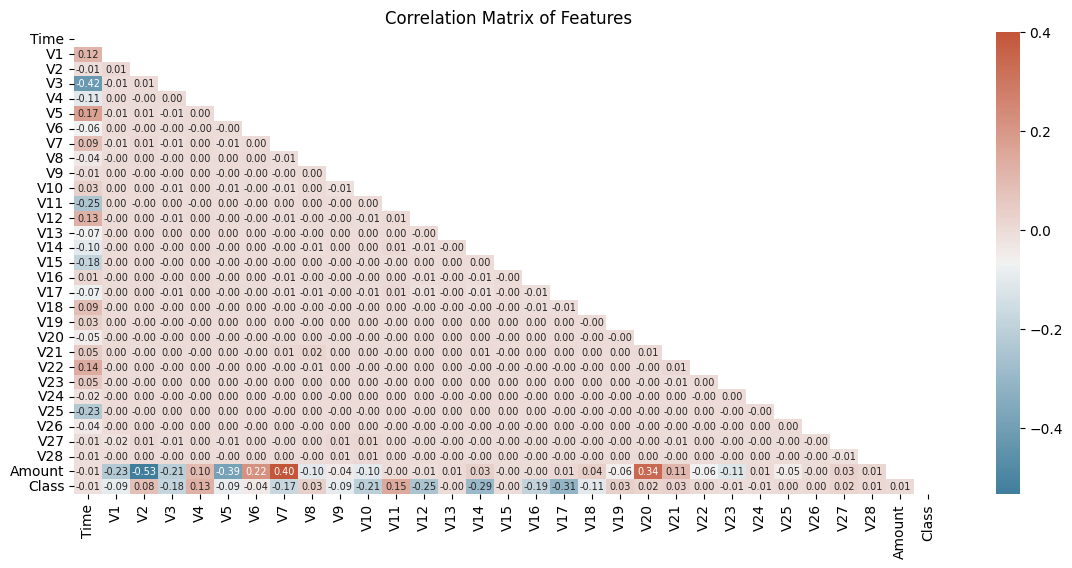

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    correlation_matrixA,
    mask=mask,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    annot_kws={'size':7}
    )
plt.title('Correlation Matrix of Features')
plt.show()

Through the Pearson Correlation Coefficient matrix, we can see that v22 to v26 have zero correlation to 'Class'; v2, v5, and v7 somehow have a strong relationship with 'Amount'; v3 is quite tied with 'Time'; each of the features from v1 to v28 has no interrelation, which is scaled from -0.01 to 0.01.

Now, we can define a preprocessing on data about 'Time' and 'Amount'

In [ ]:
# Feature engineering the 'Time' and 'Amount'
# The original time is covered over 172792 seconds, which is 48 hours, arranged in ascending order, which is candid right skewed.
def proc_data(df):
  df['log_amount'] = np.log(df['Amount'] + 0.0001) # add 0.0001 avoid log(0) error
  # Fixed syntax: Use np.round for 2 decimal precision instead of invalid np.float.2f
  df['norm_time'] = df['Time'].apply(lambda x: np.round((x / 3600) % 24, 2))

proc_data(df)
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,log_amount,norm_time
194789,130757.0,1.990215,0.494499,-2.325781,0.679992,0.529842,-1.463668,0.225242,-0.214476,0.320036,-1.023658,1.932473,0.228283,-0.645715,-2.223211,0.468222,0.908886,1.635812,1.713233,-0.509034,-0.185146,0.154598,0.594069,-0.036585,-0.210779,0.183937,-0.118450,0.016180,-0.003159,1.00,0,0.000100,12.32
214778,139816.0,-2.171766,2.154979,0.362773,2.805878,0.673935,-0.146337,1.428657,-0.604010,-0.972926,2.583500,-1.107890,-0.973124,-0.162075,-0.260571,-0.254244,0.478620,-0.997839,-0.122594,-1.295364,-0.354028,0.253654,0.948943,-0.536579,0.053598,-0.359819,-0.136587,-2.583466,-1.290632,45.89,0,3.826249,14.84
281995,170581.0,1.747207,-1.250499,-0.479504,0.592577,-1.096511,0.108780,-0.883817,0.135717,-0.233012,1.157405,0.108370,-0.038810,-0.714709,0.289006,0.136223,-0.739031,-0.778267,2.369969,-1.223101,-0.404244,-0.022523,0.137025,0.053799,-0.477433,-0.294334,-0.566418,0.045989,-0.015066,158.00,0,5.062596,23.38
141592,84413.0,-1.065949,-3.902050,-1.313225,1.232990,-1.697335,-0.701088,1.755443,-0.551708,0.237096,-0.729596,-0.633654,-0.131859,-0.762569,0.616730,0.353663,-0.093230,0.143121,-0.396839,-0.087261,2.338628,0.643413,-0.824771,-1.153751,0.515618,0.066756,0.962949,-0.330976,0.204053,1228.00,0,7.113142,23.45
32126,36649.0,-0.267262,1.238317,0.718582,0.999813,-0.266029,-0.861346,0.337255,0.265614,-0.685493,-0.360201,-0.654254,0.040512,0.025202,0.638390,0.986981,-0.146526,-0.035772,0.125866,0.343949,-0.153592,0.170270,0.415590,-0.065857,0.394550,-0.138367,-0.327563,-0.042567,-0.018687,4.73,0,1.553946,10.18
7397,9988.0,-0.729189,0.684368,2.024593,-1.264475,0.336905,0.305141,0.298915,0.259644,0.815846,-1.269375,2.616319,-1.725471,1.499284,1.668731,-0.387292,0.182506,0.393282,-0.475471,-1.262625,-0.182033,-0.097899,-0.088984,-0.083237,-0.297977,-0.358894,0.748768,-0.016201,0.061098,5.00,0,1.609458,2.77
50239,44404.0,0.985425,-0.543453,-0.015695,-0.120421,-0.559245,-0.613861,0.070078,-0.107929,0.045003,-0.069991,1.087464,0.579634,-0.251486,0.518181,0.471921,0.519736,-0.632543,0.284940,0.390464,0.243713,0.134754,0.032003,-0.232465,0.079921,0.324282,1.090722,-0.122228,0.012500,157.29,0,5.058092,12.33
234446,147976.0,-2.881643,2.405190,-0.120253,-0.931371,-0.176334,1.467338,-1.519955,-2.258659,0.282578,-0.165695,-0.119557,1.556695,1.182230,0.319944,-0.177286,0.519012,-0.467370,0.708677,0.882983,-0.961180,3.130742,-1.322225,0.467993,-0.280622,-0.144914,-0.584964,-0.892162,0.032905,5.00,0,1.609458,17.10
235895,148582.0,-0.625178,0.987110,1.210306,0.469519,0.830959,0.849400,0.613575,0.118401,0.224458,-0.554216,-1.943565,0.321720,0.419326,-0.562284,-1.199039,-0.532507,-0.185614,-0.572200,0.868291,-0.104039,-0.478113,-1.225229,-0.093780,-0.034426,-0.130292,-1.027652,-0.073654,0.136897,11.98,0,2.483247,17.27
141005,84075.0,-0.670935,1.118534,0.574413,0.961391,-0.129964,-0.416648,0.225369,0.352751,-0.450039,-0.163641,-0.517329,-0.205969,-0.594635,0.708901,1.334964,-0.420121,0.256165,-0.261964,0.012672,-0.323739,0.198934,0.495690,0.104543,0.065305,-0.221615,-0.313784,-0.258792,-0.056131,14.17,0,2.651134,23.35


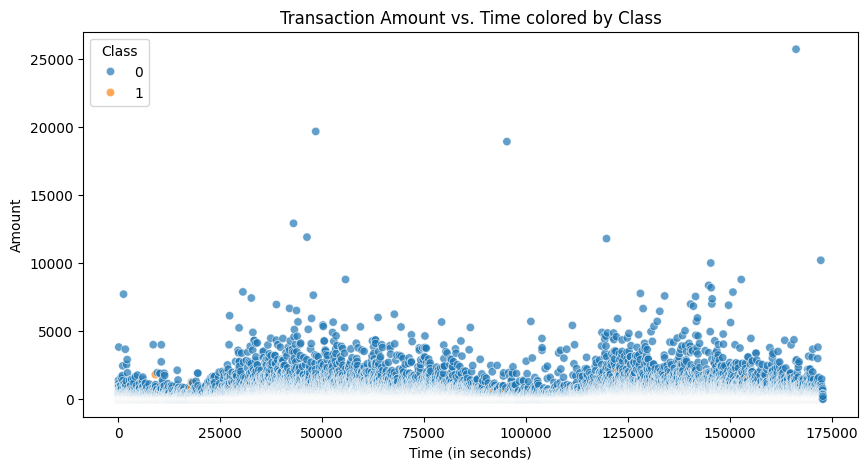

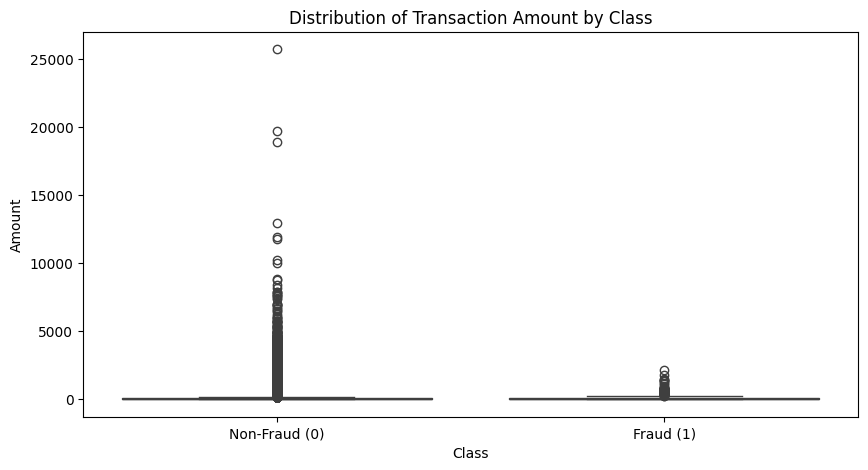

In [ ]:
# spot outliers using time and amount, analyze relationship between 'Time', 'Amount', and 'Class'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.7)
plt.title('Transaction Amount vs. Time colored by Class')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

# Analyze the distribution of 'Amount' for each class, boxplot shows the relationship between class and amount.
# Superisingly the excessive amount is not fraud, and fraud values are embeding in quite small amount clustered under 3000
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

We can see if we use original 'Time' and 'Amount' to plot the distribution of each transaction, they tell me little about anything. However, we can inspect the data by using normalized data below.



In [ ]:
# Since it is hard to visually have a concept that how inblance the data frame is, we can count the value in each 'Class'
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    283253
1       473
Name: count, dtype: int64


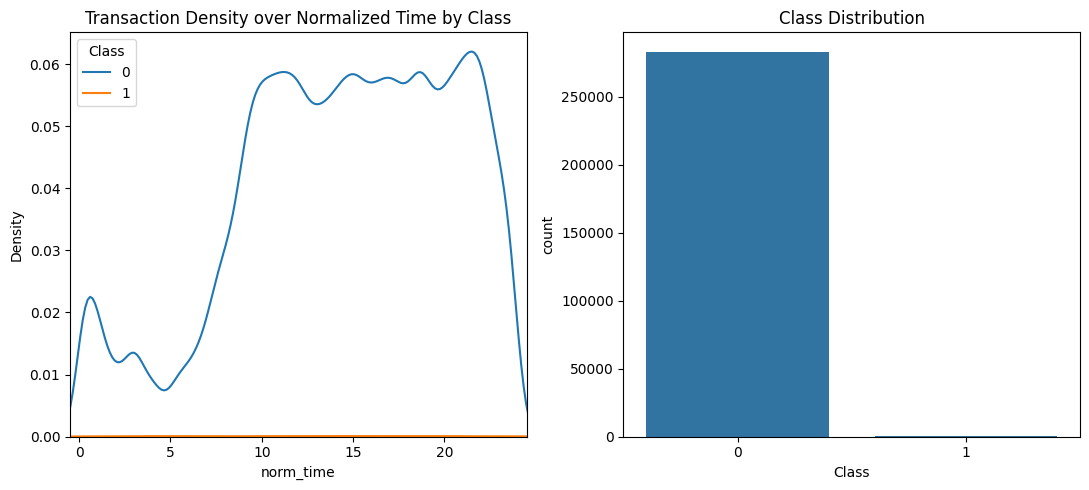

In [ ]:
# Now we have a impression that the Fraud transaction is just teenie tiny chunk of observations in the data frame
# Let's plot again with the normalized time and amount

fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# KDE Plot for Time.
sns.kdeplot(data=df, x='norm_time', hue='Class', ax=axs[0]).set(title="Transaction Density over Normalized Time by Class", xlim=(-0.5,24.5))

# Count Plot for Class Balance
# Changed x to 'Class' to correctly show the number of samples per class
sns.countplot(data=df, x='Class', fill = 'Class', ax=axs[1]).set(title ='Class Distribution')

plt.tight_layout()
plt.show()

The data has been scaled into a readable range, but the total number of fraud cases is so small that it can barely be discerned from those plots. Therefore, we try a different approach to re-examine the data frame.

It becomes obvious that most outliners are non-fraud, and fraud transactions are so shrewd to be embedded in the massive non-fraud transactions. Yet, the medians of 'log_amount' in both categories suggest that the fraud transactions are slightly lower than normal ones, with a wide range.

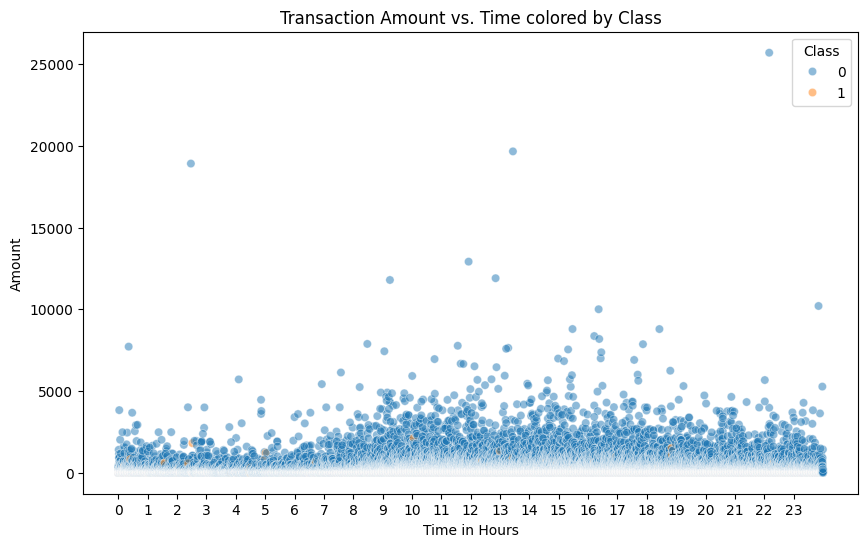

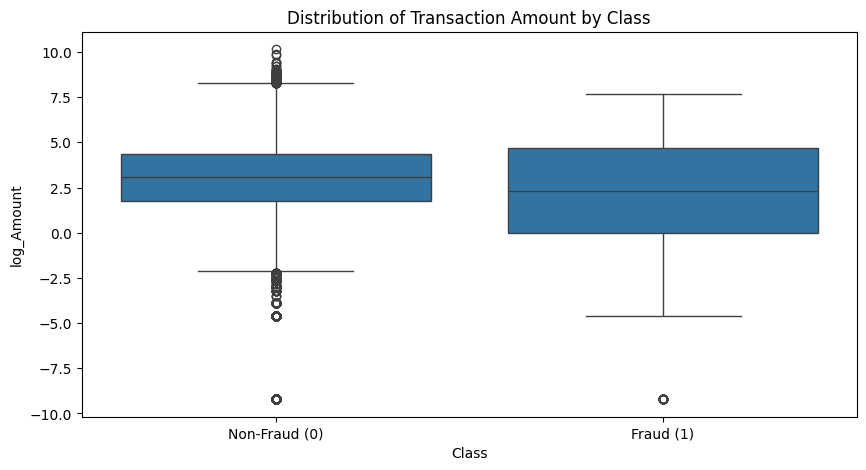

In [ ]:
# Analyze the distribution of normalized time in hours.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='norm_time', y='Amount', hue='Class', data=df, alpha=0.5)
plt.title('Transaction Amount vs. Time colored by Class')
plt.xticks(np.arange(0, 24, 1))
plt.xlabel('Time in Hours')
plt.ylabel('Amount')
plt.show()

# Analyze the distribution of 'normalized_amount' for each class, boxplot shows the relationship between class and amount.
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='log_amount', data=df)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('log_Amount')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

In [ ]:
# I naively start to train our model with manually build a Forword Feeding Neural Network
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import LeakyReLU, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight


# Separate features X and target y
X = df.drop(['Class', 'Time', 'Amount'], axis=1)
y = df['Class']


print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# train/test split to get 20% of data to be test data, since the output of this model is binary, use STRATIFY to prevent bias
X_temp, X_test, y_temp, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train/test split to get 60% of data to be train data, 20% to be validate data
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_temp, y_temp, test_size = 0.25, random_state=42, stratify=y_temp)
print(f'Preview of X_train:\n {X_train.sample(5)}')
print(f'\nNumber of X_train: {X_train.shape, sum(y_train == 1)}, Number of X_val: {X_val.shape,sum(y_val == 1)}, Number of X_test: {X_test.shape, sum(y_test == 1)}')

Shape of features (X): (283726, 30)
Shape of target (y): (283726,)
Preview of X_train:
               V1        V2        V3        V4        V5        V6        V7        V8        V9       V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28  log_amount  norm_time
172435  2.054988  0.284268 -1.678520  0.516621  0.273810 -1.419993  0.320024 -0.423396  0.446953 -0.506613 -0.137780  0.585974  0.936551 -0.911641  0.841109  0.099178  0.398917  0.294168 -0.509855 -0.158464  0.210478  0.844067 -0.022356 -0.051235  0.271292 -0.101173  0.007566 -0.030176   -0.891354       9.64
275604  2.294711 -1.039926 -2.004656 -2.779157 -0.196172 -0.733145 -0.279530 -0.396432  1.126657 -0.546416 -1.493828  1.222056  1.721429 -0.296870  0.061856 -2.998996  0.118240  1.298213  0.779918 -0.500981 -0.214606  0.355728 -0.101999  0.105312  0.623506 -0.549262  0.065827 -0.053943    1.

In [ ]:
# Since the dataset is all numerical, therefore, there is no encoding categorical variables for training
# I think there is no embeding necessary for this dataset as well
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# create the model
def create_FFNN(input_dim):
   # Creates a Feedforward Neural Network model.
    model = keras.Sequential([
        layers.Dense(64, activation=LeakyReLU(alpha=0.1), input_shape=(input_dim,)),
        # layers.Dense(32, activation=LeakyReLU(alpha=0.01)),
        layers.Dense(32, activation='linear'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid') # Changed to 1 neuron with sigmoid for binary classification
    ])
    return model

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# calculate class weights based on the ORIGINAL (imbalanced) training data, y_train is our raw 0/1 label
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print(class_weight_dict)

{np.int64(0): np.float64(0.5008355349483087), np.int64(1): np.float64(299.7095070422535)}


In [ ]:
# Instantiate the model
model = create_FFNN(X_train_scaled.shape[1])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  tf.keras.metrics.AUC(curve='ROC', name='auc'),
                  tf.keras.metrics.AUC(curve='PR', name='auprc')
              ])

model.summary()

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,  # You can adjust the number of epochs
    batch_size=128, # You can adjust the batch size
    validation_split=0.2, # Using a validation split for monitoring
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr]# Add class weights here
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.8944 - auprc: 0.5986 - loss: 0.3172 - precision: 0.0365 - recall: 0.7996 - val_auc: 0.9833 - val_auprc: 0.5941 - val_loss: 0.1866 - val_precision: 0.0210 - val_recall: 0.9643 - learning_rate: 0.0010
Epoch 2/50
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.9883 - auprc: 0.7082 - loss: 0.1292 - precision: 0.0354 - recall: 0.9428 - val_auc: 0.9728 - val_auprc: 0.4002 - val_loss: 0.1149 - val_precision: 0.0374 - val_recall: 0.9107 - learning_rate: 0.0010
Epoch 3/50
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.9793 - auprc: 0.4947 - loss: 0.1278 - precision: 0.0348 - recall: 0.9152 - val_auc: 0.9874 - val_auprc: 0.6822 - val_loss: 0.0640 - val_precision: 0.0612 - val_recall: 0.9286 - learning_rate: 0.0010
Epoch 4/50
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.9939 - auprc: 0.6925 - loss: 0.0925 - precision: 0.0652 - recall: 0.9757 - val_auc: 0.9878 - val_auprc: 0.6192 - val_loss: 0.0702 - val_precision: 0.06

In [ ]:
# Evaluate the model on the valid set
loss, precision, recall, auc, auprc = model.evaluate(X_val_scaled, y_val)

# Generate predictions on the valid set
y_pred = (model.predict(X_val_scaled) > 0.5).astype("int32")

# Display classification report and confusion matrix
# To control precision, use digits=4 inside classification_report()
print(f'\nClassification Report:\n {classification_report(y_val, y_pred, labels= [1,0], digits=2)}')
print(f'\nConfusion Matrix:\n {confusion_matrix(y_val, y_pred,labels=[1,0])}')

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.9341 - auprc: 0.7811 - loss: 0.0111 - precision: 0.7487 - recall: 0.8754
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.87      0.76        94
           0       1.00      1.00      1.00     56651

    accuracy                           1.00     56745
   macro avg       0.84      0.94      0.88     56745
weighted avg       1.00      1.00      1.00     56745


Confusion Matrix:
 [[   82    12]
 [   39 56612]]


The model has done a good job on catching all 87% of "Fraud" attempts, besides, it has not struggle to predict lots of "Fraud" attempts, which only 39 are actually "Non-Fraud". With a precision score in catching "1" is 68%, which means every 1 real criminal it caught, it may froze credit cards of other 1 innocent people. It is massive win in real world. However, I still seek to see if there is any other way to improve the stability and performance of this project. Let's check with the test data to see its performance again.

In [ ]:
# Evaluate the model on the test set
loss, precision, recall, auc, auprc = model.evaluate(X_test_scaled, y_test)

# Generate predictions on the test set
y_pred = (model.predict(X_test_scaled) > 0.75).astype("int32")

# Display classification report and confusion matrix
# To control precision, use digits=4 inside classification_report()
print(f'\nClassification Report:\n {classification_report(y_test, y_pred,labels= [1,0], digits=2)}')
print(f'\nConfusion Matrix:\n {confusion_matrix(y_test, y_pred, labels=[1,0])}')

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - auc: 0.9006 - auprc: 0.7540 - loss: 0.0101 - precision: 0.6886 - recall: 0.7909
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.79      0.76        95
           0       1.00      1.00      1.00     56651

    accuracy                           1.00     56746
   macro avg       0.87      0.89      0.88     56746
weighted avg       1.00      1.00      1.00     56746


Confusion Matrix:
 [[   75    20]
 [   27 56624]]


In [ ]:
# Save the trained model
model.save('fraud_detection_model.keras')
print("Model saved successfully!")

Model saved successfully!


It has proved that it has a quite stable performance on test data, which is as the same size as validate data. is it a overfitting, or is there a better way to train a model with reasonable presion on fraud with high recall?

##What to do next?
1. Adjust the decision threshold — _e.g., only predict class if probability > 0.9 to boost precision (at the cost of recall)_;
2. Use class weighting or resampling (_**SMOTE** / **undersampling**_) to balance the data;
3. Try other loss functions (**binary focal loss**);
4. Tune architecture or regularization slightly, including more hidden units, dropout between layers, or _**BatchNormalization()_** helps stablize learning, especially for the weak minority signal.


Let's check out the first 6 features to see whether they are normal distributed, this is useful, because we just used _StandardScaler()_ to handle our data. It is sensitive to outliers, which can skew the mean and standard deviation. Since 'Fraud' observations in this dataset is not as extreme as we naively expected, the idea is that whether it is okay to use _RobustScaler()_, which is resilient to outliers.

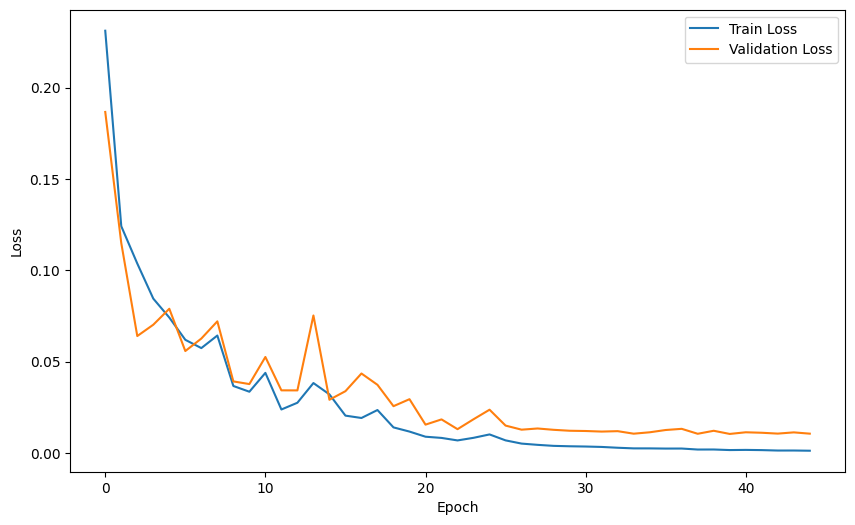

In [ ]:
# check the loss in terms of training
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# plot the Loss to diagnose whether it is a overfitting
plt.figure(figsize=(10,6))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# result seems quite health, the spike in epoch 14 may be a bad batch full of outliners

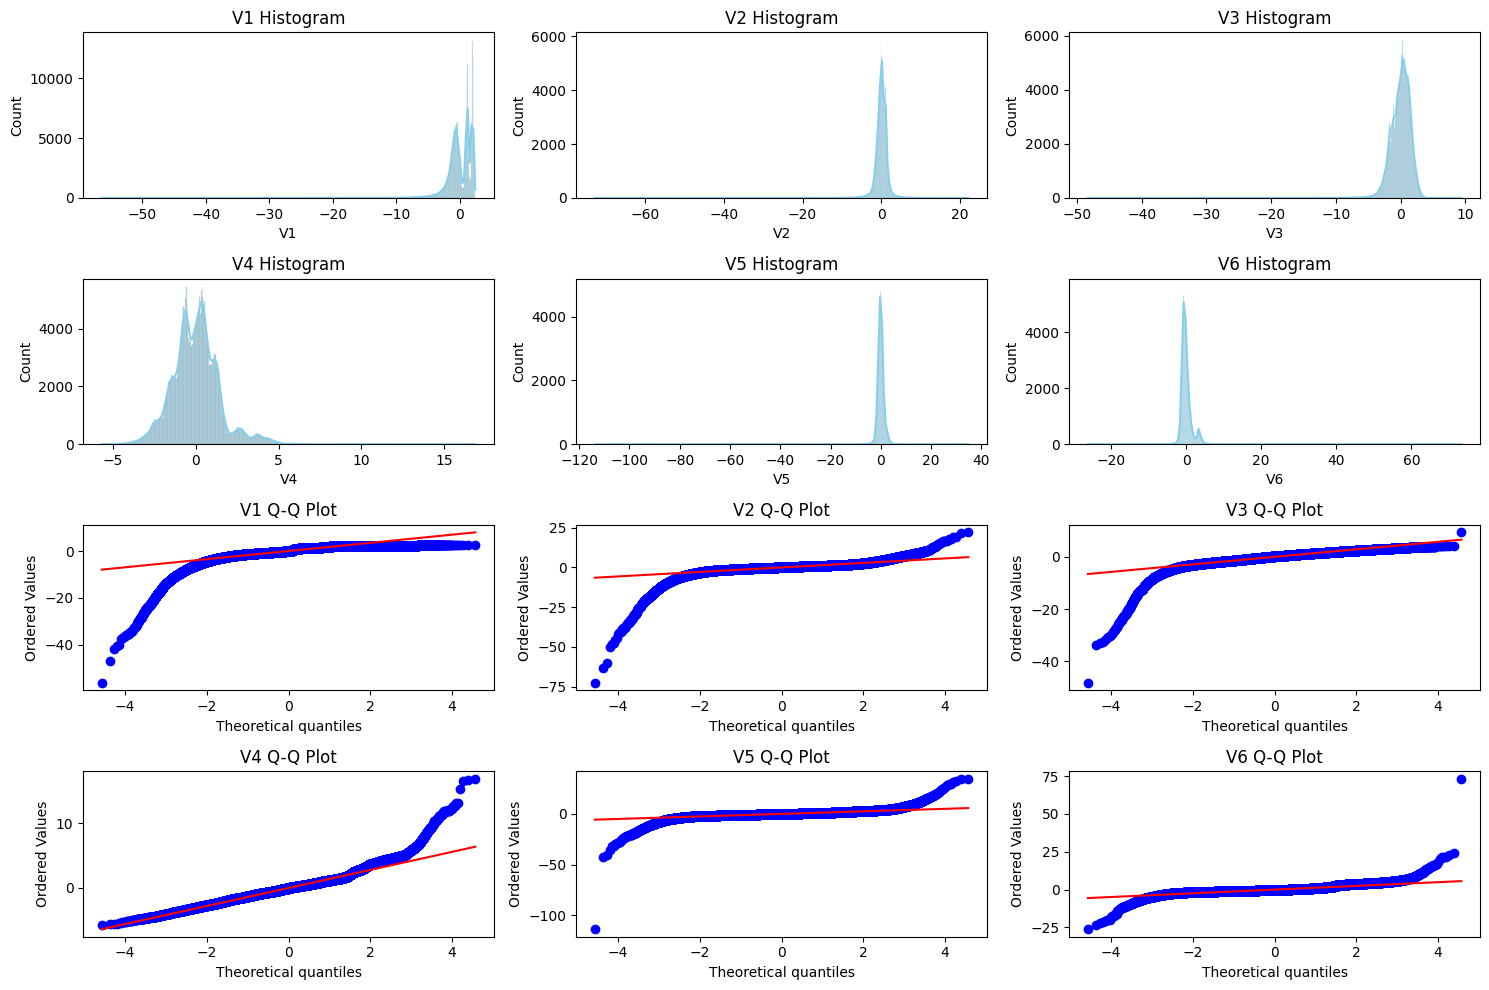

In [ ]:
import scipy.stats as stats

# Pick a few features to compare (Limit to first 3 to fit the 2x3 grid)
features_to_check = X.drop(columns=['norm_time', 'log_amount'], axis=1).iloc[:, :6]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_check):
    # 1. Histogram (Top Row)
    # 2 rows, 3 columns, index i+1
    plt.subplot(4, 3, i+1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'{feature} Histogram')

    # 2. Q-Q Plot (Bottom Row)
    # 2 rows, 3 columns, index i+7 (shifted by 3 for the third row)
    plt.subplot(4, 3, i+7)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'{feature} Q-Q Plot')

plt.tight_layout()
plt.show()

##Try annother approach to deal with the dataset.
I want to more understand and control on data and model training about the logic work within the model, so I switch to Pytorch
v1 to v28 are like latent factors to the explicit features like 'Time' and 'Amount'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

# 1. Initialize the RobustScaler
scaler = RobustScaler()

# 2. Scale the training data
X_train_Robscaled = scaler.fit_transform(X_train)
X_val_Robscaled = scaler.transform(X_val)
X_test_Robscaled = scaler.transform(X_test)

# 3. I want to train the ONLY on normal transactions, since V1 to V28 can be seeing as latent factors in terms of time and amount
train_mask = (y_train == 0)
X_train_normal = X_train_Robscaled[train_mask]

# 4. convert to PyTorch Tensors
tensor_x_train_normal = torch.tensor(X_train_normal, dtype=torch.float32)
tensor_x_val = torch.tensor(X_val_Robscaled, dtype=torch.float32)
tensor_x_test = torch.tensor(X_test_Robscaled, dtype=torch.float32)

# build a dataloader for normal data only
train_dataset = TensorDataset(tensor_x_train_normal)
test_dataset = TensorDataset(tensor_x_test)

# You can modify the batch size here
BATCH_SIZE = 32
normal_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

print(f'Training AutoDetect on {len(X_train_normal)} normal transactions with batch size {BATCH_SIZE}.')

Training AutoDetect on 169951 normal transactions with batch size 32.


In [ ]:
# 2. Define the AutoDetect Model
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim=16):
        super().__init__()
        self.flatten = nn.Flatten()

        # Encoder: Compresses input to latent space
        # Dimensions: Input(30) -> 32 -> 16 -> Latent(16)
        self.encoder = nn.Sequential(
            # Layer 1
            nn.Linear(input_dim, 32),
            nn.LeakyReLU(0.2),

            # Layer 2
            nn.Linear(32, 16),
            nn.LeakyReLU(0.2),

            # Latent Layer
            nn.Linear(16, latent_dim),
            nn.Sigmoid() # Squashes latent representation to [0, 1]
        )

        # Decoder: Reconstructs input from latent space
        # Dimensions: Latent(16) -> 32 -> 16 -> Input(30)
        self.decoder = nn.Sequential(
            # Layer 1
            nn.Linear(latent_dim, 32),
            nn.LeakyReLU(0.2),

            # Layer 2
            nn.Linear(32, 16),
            nn.LeakyReLU(0.2),

            # Output Layer
            nn.Linear(16, input_dim)
            # Note: No activation at the end because RobustScaler data isn't bounded to [0,1]
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed

# Initialize model
input_dim = X_train_scaled.shape[1]
model_ae = AutoEncoder(input_dim=input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_ae.parameters(), lr=0.001)

Starting training...
Epoch [5/50], Loss: 0.466684
Epoch [10/50], Loss: 0.415654
Epoch [15/50], Loss: 0.375190
Epoch [20/50], Loss: 0.343751
Epoch [25/50], Loss: 0.323842
Epoch [30/50], Loss: 0.299581
Epoch [35/50], Loss: 0.292276
Epoch [40/50], Loss: 0.295830
Epoch [45/50], Loss: 0.287764
Epoch [50/50], Loss: 0.287358


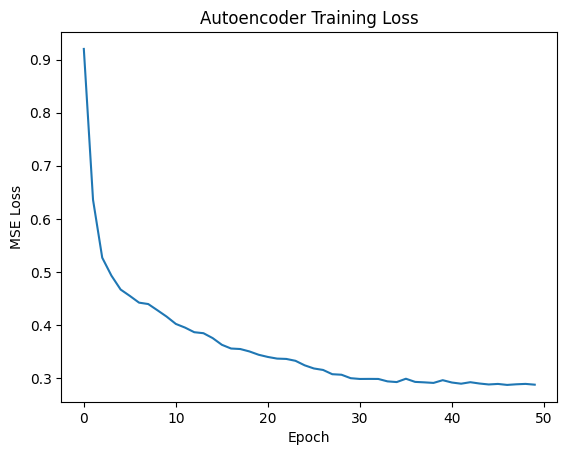

In [ ]:
# 3. Train the AutoEncoder
epochs = 50
history_loss = []

print("Starting training...")
for epoch in range(epochs):
    model_ae.train()
    epoch_loss = 0
    for batch in normal_loader:
        data = batch[0]

        optimizer.zero_grad()
        outputs = model_ae(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(normal_loader)
    history_loss.append(avg_loss)
    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

plt.plot(history_loss)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

Validation MSE - Mean: 0.3057, Std: 1.2121, Max: 70.8717
Test MSE       - Mean: 0.3281, Std: 5.9944, Max: 1401.2198


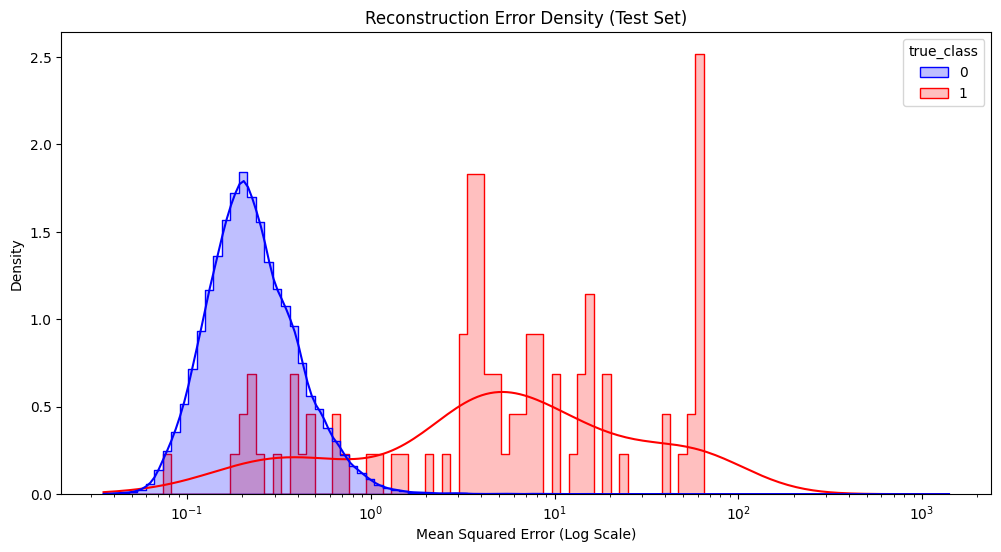

Fraud transactions should statistically have higher reconstruction errors.


In [ ]:
# 4. Detect Fraud using Reconstruction Error
model_ae.eval()
with torch.no_grad():
    # 1. Validation Data (Use this to tune threshold
    reconstructed_val = model_ae(tensor_x_val)
    val_mse = torch.mean((tensor_x_val - reconstructed_val) ** 2, dim=1).numpy()

    # 2. Test Data (Use this to evaluate final performance
    reconstructed_test = model_ae(tensor_x_test)
    test_mse = torch.mean((tensor_x_test - reconstructed_test) ** 2, dim=1).numpy()

# Print Results Summary
print(f"Validation MSE - Mean: {val_mse.mean():.4f}, Std: {val_mse.std():.4f}, Max: {val_mse.max():.4f}")
print(f"Test MSE       - Mean: {test_mse.mean():.4f}, Std: {test_mse.std():.4f}, Max: {test_mse.max():.4f}")

# Visualize the Error Distribution (Test Set)
# Corrected: Using test_mse and y_test.values to match the title
error_df = pd.DataFrame({'reconstruction_error': test_mse, 'true_class': y_test.values})

plt.figure(figsize=(12, 6))
sns.histplot(
    data=error_df,
    x='reconstruction_error',
    hue='true_class',
    bins=100,
    kde=True,
    log_scale=True,
    palette={0: 'blue', 1: 'red'},
    stat='density',
    common_norm=False,
    element="step"
)

plt.title('Reconstruction Error Density (Test Set)')
plt.xlabel('Mean Squared Error (Log Scale)')
plt.show()

print("Fraud transactions should statistically have higher reconstruction errors.")

Normal MSE Mean: 0.2781
Normal MSE Std:  0.5715

Z-Score Threshold (k=5): 3.1353

--- Test Set Performance (Z-Score) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.54      0.71      0.61        95

    accuracy                           1.00     56746
   macro avg       0.77      0.85      0.81     56746
weighted avg       1.00      1.00      1.00     56746


Test Confusion Matrix:
[[   67    28]
 [   56 56595]]


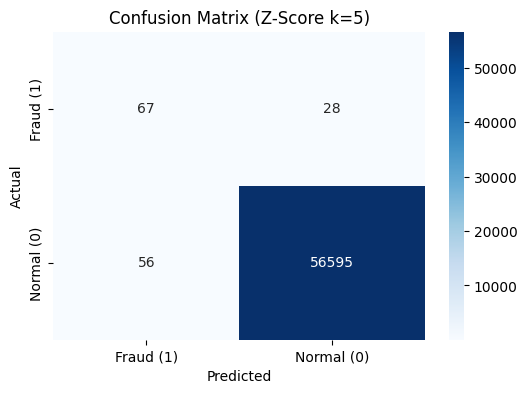

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Ensure labels are numpy arrays
y_val_np = y_val.values
ny_test_np = y_test.values

# --- 1. Z-Score Strategy ---
# We calculate statistics ONLY on the Normal transactions in the Validation set
val_normal_mask = (y_val_np == 0)
val_mse_normal = val_mse[val_normal_mask]

# Calculate Mean and Standard Deviation
mu = np.mean(val_mse_normal)
sigma = np.std(val_mse_normal)

print(f"Normal MSE Mean: {mu:.4f}")
print(f"Normal MSE Std:  {sigma:.4f}")

# Set Threshold: Mean + k * Std (Standard is k=3)
k = 5
z_threshold = mu + (k * sigma)

print(f"\nZ-Score Threshold (k={k}): {z_threshold:.4f}")

# --- 2. Evaluate on TEST Set ---
# Apply the Z-score threshold
y_pred_test_z = (test_mse > z_threshold).astype(int)

print("\n--- Test Set Performance (Z-Score) ---")
print(classification_report(ny_test_np, y_pred_test_z))

print("\nTest Confusion Matrix:")
cm = confusion_matrix(ny_test_np, y_pred_test_z, labels=[1, 0])
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fraud (1)', 'Normal (0)'], yticklabels=['Fraud (1)', 'Normal (0)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Z-Score k={k})')
plt.show()

In [ ]:
torch.save(model_ae.state_dict(), 'autoencoder_model.pth')
print("Model saved successfully!")

Model saved successfully!


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step
Ensemble (Logical or) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.48      0.81      0.60        95

    accuracy                           1.00     56746
   macro avg       0.74      0.90      0.80     56746
weighted avg       1.00      1.00      1.00     56746



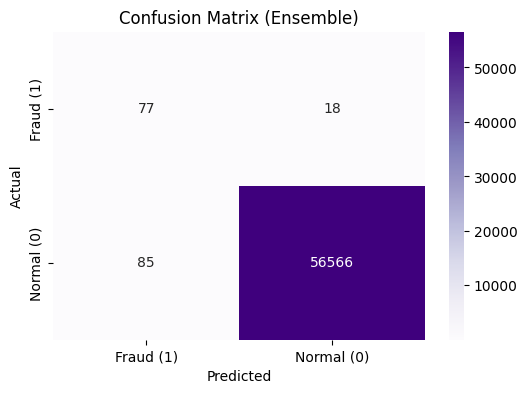

In [ ]:
# 1. Get Supervised Predictions (Keras)
# We re-run this to be sure, using the threshold
y_pred_supervised = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# 2. Get Unsupervised Predictions (Autoencoder)
# We use the optimal threshold we found earlier
y_pred_autoencoder = (test_mse > z_threshold).astype("int32")

# 3. Combine them (Logical OR)
# Flag as fraud if EITHER model thinks it's fraud
y_pred_ensemble = np.bitwise_or(y_pred_supervised, y_pred_autoencoder)

# 4. Evaluate the Ensemble
print("Ensemble (Logical or) Performance:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble, labels=[1, 0])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Purples', xticklabels=['Fraud (1)', 'Normal (0)'], yticklabels=['Fraud (1)', 'Normal (0)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Ensemble)')
plt.show()

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step
Best Ensemble Threshold: 0.6993
Best Ensemble F1-Score: 0.8214

Weighted Ensemble Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.72      0.81        95

    accuracy                           1.00     56746
   macro avg       0.97      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



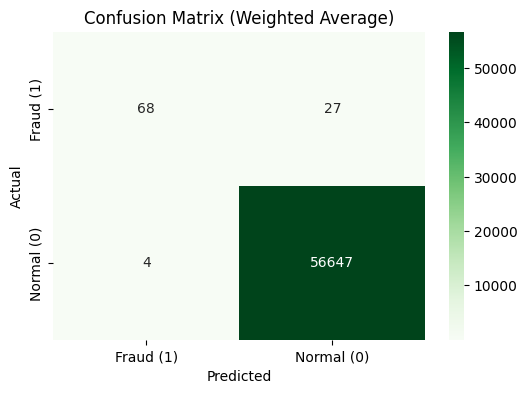

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_test is a numpy array
y_test_np = y_test.values

# 1. Normalize Autoencoder Errors to [0, 1] range
# We use 'test_mse' which was calculated in the evaluation cell
mse_min = test_mse.min()
mse_max = test_mse.max()
ae_scores_norm = (test_mse - mse_min) / (mse_max - mse_min)

# 2. Get Supervised Model Probabilities
supervised_probs = model.predict(X_test_scaled).flatten()

# 3. Calculate Weighted Average
# 70% Supervised (High Precision), 30% Autoencoder (Anomaly Detection)
w_supervised = 0.7
w_autoencoder = 0.3

ensemble_scores = (w_supervised * supervised_probs) + (w_autoencoder * ae_scores_norm)

# 4. Find Optimal Threshold for the Ensemble Score
precision, recall, thresholds = precision_recall_curve(y_test_np, ensemble_scores)

# Safe F1 calculation
numerator = 2 * precision * recall
denominator = precision + recall
f1_scores = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)

# FIX: Use f1_scores[:-1] to match the length of thresholds
best_idx = np.argmax(f1_scores[:-1])
best_threshold_ens = thresholds[best_idx]
max_f1_ens = f1_scores[best_idx]

print(f"Best Ensemble Threshold: {best_threshold_ens:.4f}")
print(f"Best Ensemble F1-Score: {max_f1_ens:.4f}")

# 5. Evaluate
y_pred_ensemble_w = (ensemble_scores > best_threshold_ens).astype(int)

print("\nWeighted Ensemble Performance:")
print(classification_report(y_test_np, y_pred_ensemble_w))

cm_w = confusion_matrix(y_test_np, y_pred_ensemble_w, labels=[1, 0])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_w, annot=True, fmt='d', cmap='Greens', xticklabels=['Fraud (1)', 'Normal (0)'], yticklabels=['Fraud (1)', 'Normal (0)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Weighted Average)')
plt.show()